#Import required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import Lasso, Ridge, ElasticNet

#Load the dataset

In [ ]:
TC = pd.read_csv('/content/ToyotaCorolla - MLR.csv')
TC

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [ ]:
TC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [ ]:
TC.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [ ]:
TC.Age_08_04.value_counts()

,count
Age_08_04,
68,69
65,63
80,59
78,47
62,42
...,...
2,2
1,2
10,1


In [ ]:
TC.cc.value_counts()
# CC stands for cubic centimeters, which measures the volume of air and fuel an engine can displace in a single piston stroke.
# Here we can see one entry as 16000, and it not possible to have cc as 16000
# So it may be mistakenly feeded as 16000, so we can either delete this row or replace it with 1600

,count
cc,
1600,845
1300,248
1400,164
2000,119
1900,30
1800,14
1598,4
1587,4
1995,2


In [ ]:
TC.Cylinders.value_counts()
#Since the column contains the same value, it does not give any information
#So we can drop this column

,count
Cylinders,
4,1435


#Drop the column

In [ ]:
TC.drop(columns = ['Cylinders'], inplace = True)
TC

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,5,1015


In [ ]:
TC.isna().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Weight,0


In [ ]:
#Rename the column for better understanding
TC.rename(columns = {'Age_08_04' : 'Car_Age'}, inplace = True)
TC

,Price,Car_Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,5,1015


#Check relationship between columns

<Axes: xlabel='KM', ylabel='Price'>

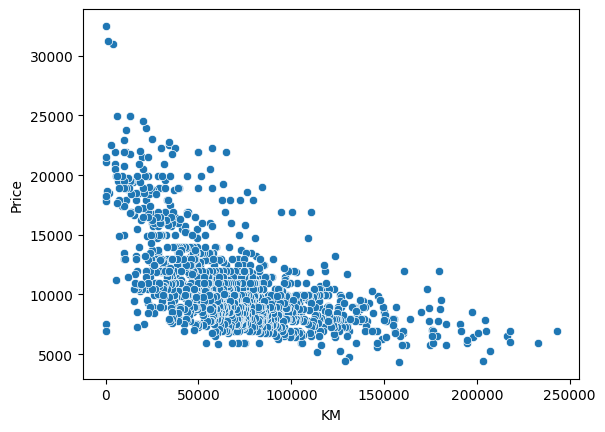

In [ ]:
sns.scatterplot(data = TC, x = 'KM', y = 'Price' )
#Linearly decreasing relationship

<Axes: xlabel='HP', ylabel='Price'>

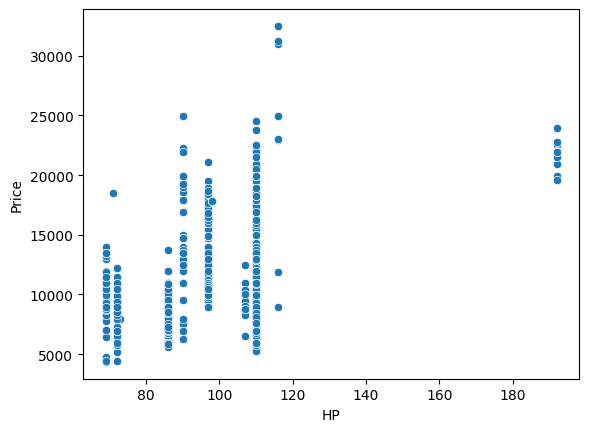

In [ ]:
sns.scatterplot(data = TC, x = 'HP', y ='Price')

#Outliers are present

<Axes: xlabel='HP'>

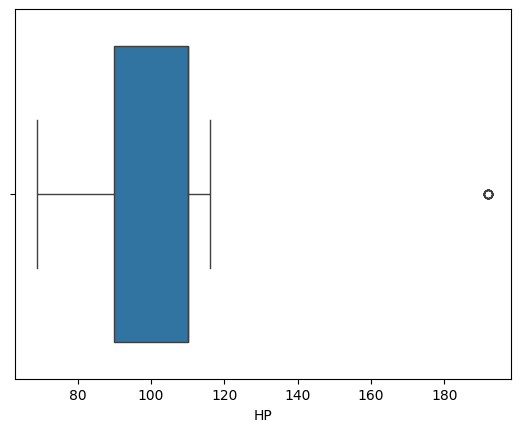

In [ ]:
sns.boxplot(data = TC, x= 'HP')

<Axes: xlabel='cc', ylabel='Price'>

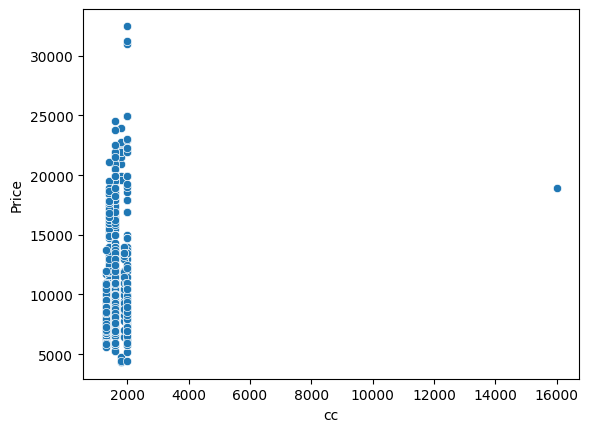

In [ ]:
sns.scatterplot(data = TC, x = 'cc', y = 'Price')
#Here we can see a single data point on 16000, that is an outlier
#So, we can dro this row

#Drop the row with the contains an outlier

In [ ]:
index= TC[TC['cc']==16000].index
TC.drop(index, inplace =True)

In [ ]:
TC.shape

(1435, 10)

<Axes: xlabel='cc', ylabel='Price'>

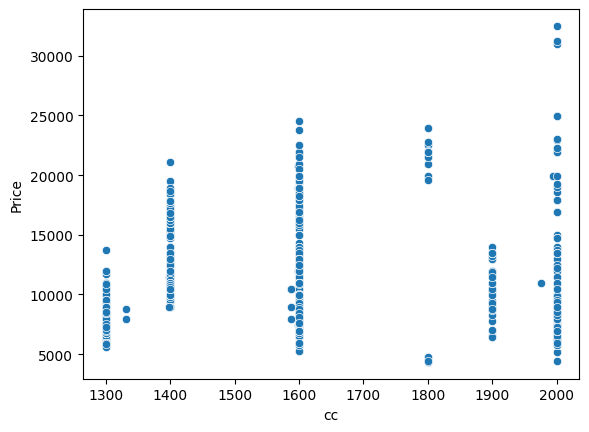

In [ ]:
sns.scatterplot(data = TC, x = 'cc', y = 'Price')

<Axes: xlabel='Weight', ylabel='Price'>

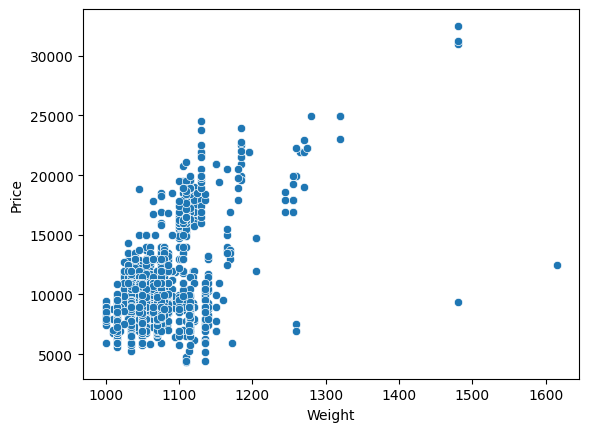

In [ ]:
sns.scatterplot(data = TC, x = 'Weight', y = 'Price')


<Axes: xlabel='Weight'>

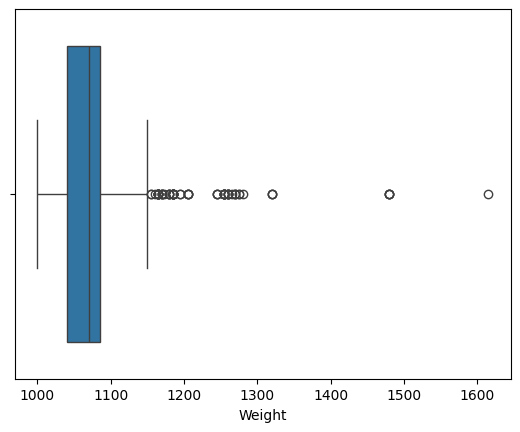

In [ ]:
sns.boxplot(data = TC, x ='Weight')
# Here we cab see that some outliers are present

<ipython-input-21-6117a01f2b93>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(TC['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

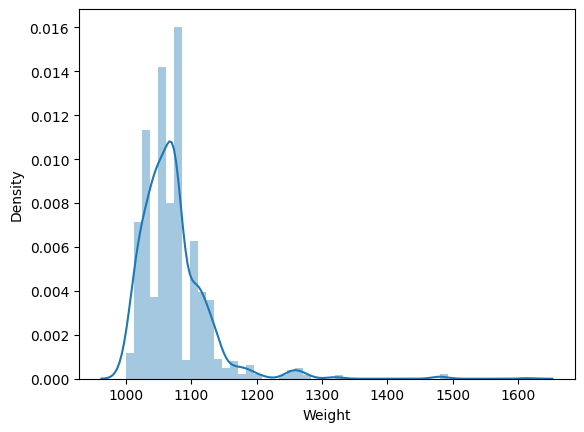

In [ ]:
sns.distplot(TC['Weight'])
#it is positively skewed, ouliers are present

<Axes: xlabel='Car_Age', ylabel='Price'>

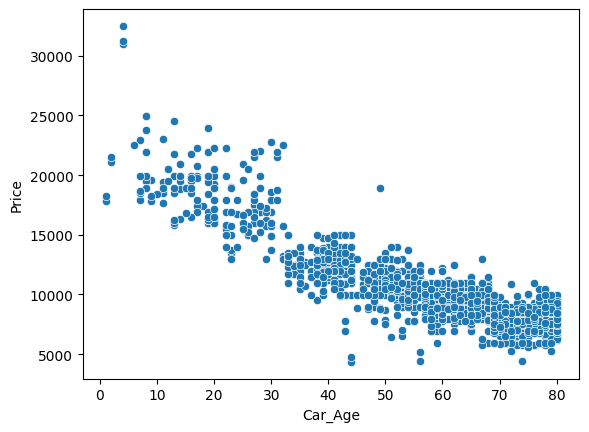

In [ ]:
sns.scatterplot(data = TC, x = 'Car_Age', y = 'Price')
#Here the Relationship between Car_Age and its price is linearly decreasing
# As the Car_Age increases, the Price of the car decreses

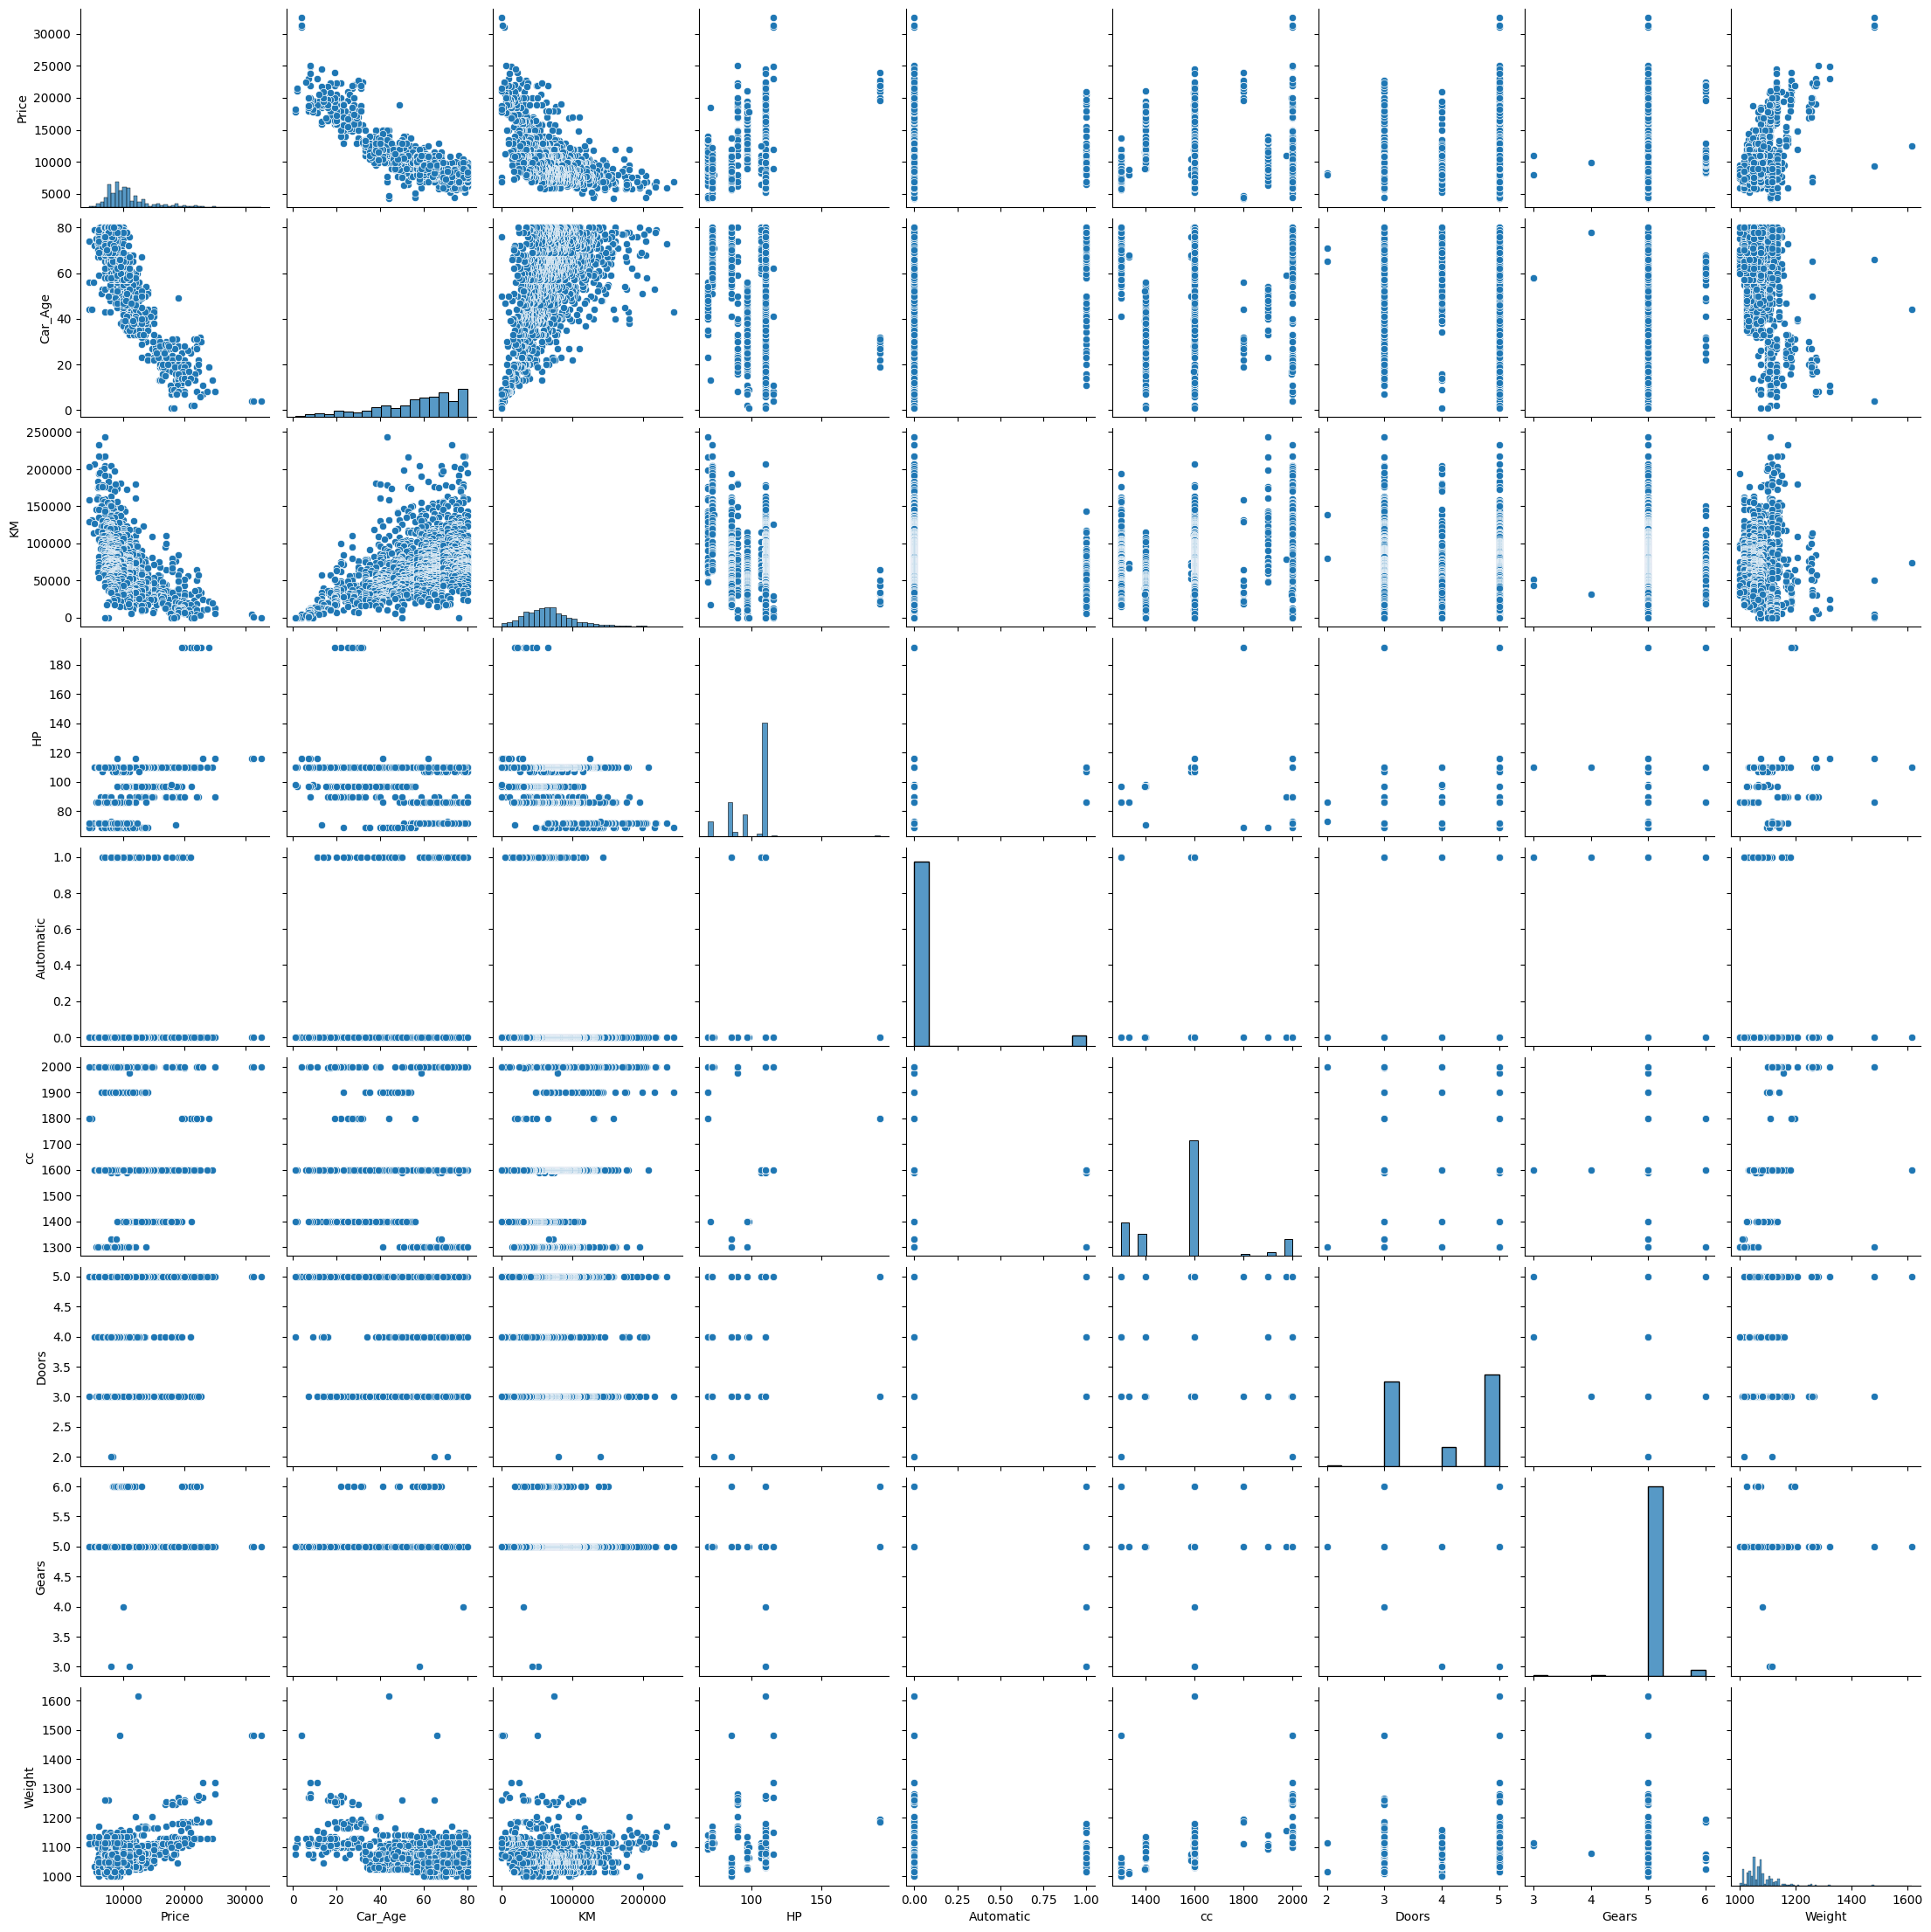

In [ ]:
sns.pairplot(data = TC)

<Axes: xlabel='Fuel_Type', ylabel='Price'>

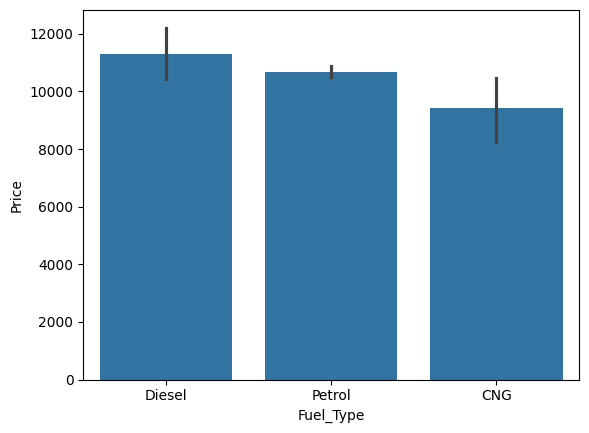

<Axes: xlabel='Fuel_Type', ylabel='Price'>

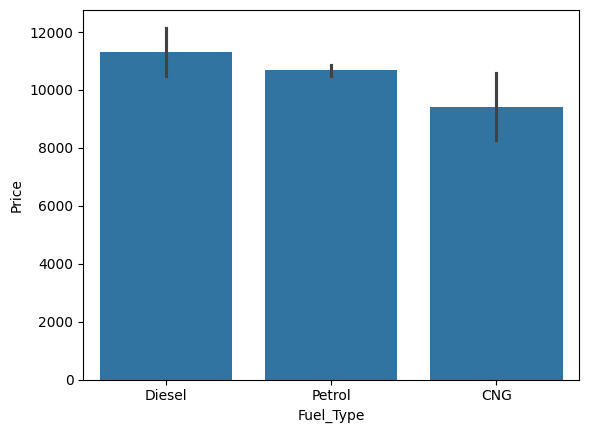

In [ ]:
sns.barplot(data = TC, x = 'Fuel_Type', y = 'Price')

<Axes: xlabel='Automatic', ylabel='Price'>

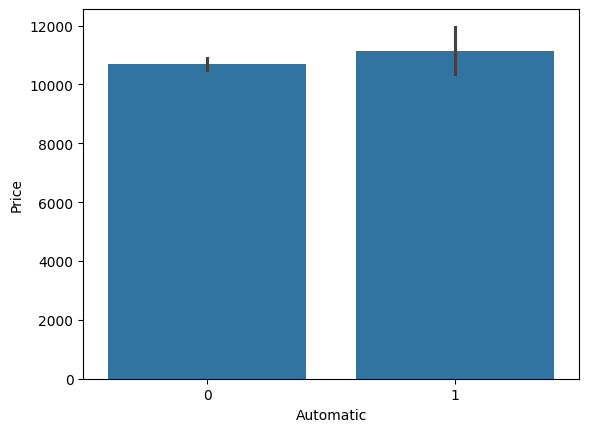

In [ ]:
sns.barplot(data = TC, x = 'Automatic', y = 'Price')
# Here 0 = not automatic, 1 = Automatic

# Change the Categorical column to Numerical

In [ ]:
TC.dtypes

,0
Price,int64
Car_Age,int64
KM,int64
Fuel_Type,object
HP,int64
Automatic,int64
cc,int64
Doors,int64
Gears,int64
Weight,int64


In [ ]:
#Selecting only Categorical Columns: Encoding
cat_col = TC.select_dtypes(object).columns #Store column names in a variable
cat_col

Index(['Fuel_Type'], dtype='object')

In [ ]:
TC[cat_col]

,Fuel_Type
0,Diesel
1,Diesel
2,Diesel
3,Diesel
4,Diesel
...,...
1431,Petrol
1432,Petrol
1433,Petrol
1434,Petrol


In [ ]:
#Convert Categorical values to numerical
oe = OrdinalEncoder()
TC[cat_col] = oe.fit_transform(TC[cat_col])

In [ ]:
TC

,Price,Car_Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1.0,90,0,2000,3,4,5,1165
1,13750,23,72937,1.0,90,0,2000,3,4,5,1165
2,13950,24,41711,1.0,90,0,2000,3,4,5,1165
3,14950,26,48000,1.0,90,0,2000,3,4,5,1165
4,13750,30,38500,1.0,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2.0,86,0,1300,3,4,5,1025
1432,10845,72,19000,2.0,86,0,1300,3,4,5,1015
1433,8500,71,17016,2.0,86,0,1300,3,4,5,1015
1434,7250,70,16916,2.0,86,0,1300,3,4,5,1015


In [ ]:
TC.dtypes

,0
Price,int64
Car_Age,int64
KM,int64
Fuel_Type,float64
HP,int64
Automatic,int64
cc,int64
Doors,int64
Gears,int64
Weight,int64


In [ ]:
TC.corr()

,Price,Car_Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
Price,1.000000,-0.876377,-0.569268,-0.022759,0.314693,0.026783,0.165085,0.184118,0.063440,0.579851
Car_Age,-0.876377,1.000000,0.504953,0.080753,-0.156132,0.036745,-0.133106,-0.147377,-0.005532,-0.469018
KM,-0.569268,0.504953,1.000000,-0.420531,-0.333258,-0.078653,0.302490,-0.035315,0.014906,-0.026810
Fuel_Type,-0.022759,0.080753,-0.420531,1.000000,0.409400,0.069114,-0.647635,-0.027197,0.069693,-0.506567
HP,0.314693,-0.156132,-0.333258,0.409400,1.000000,0.011586,0.050820,0.092067,0.209558,0.088945
Automatic,0.026783,0.036745,-0.078653,0.069114,0.011586,1.000000,-0.070247,-0.030759,-0.098738,0.051767
cc,0.165085,-0.133106,0.302490,-0.647635,0.050820,-0.070247,1.000000,0.126689,0.040712,0.652154
Doors,0.184118,-0.147377,-0.035315,-0.027197,0.092067,-0.030759,0.126689,1.000000,-0.160101,0.301720
Gears,0.063440,-0.005532,0.014906,0.069693,0.209558,-0.098738,0.040712,-0.160101,1.000000,0.020844
Weight,0.579851,-0.469018,-0.026810,-0.506567,0.088945,0.051767,0.652154,0.301720,0.020844,1.000000


<Axes: >

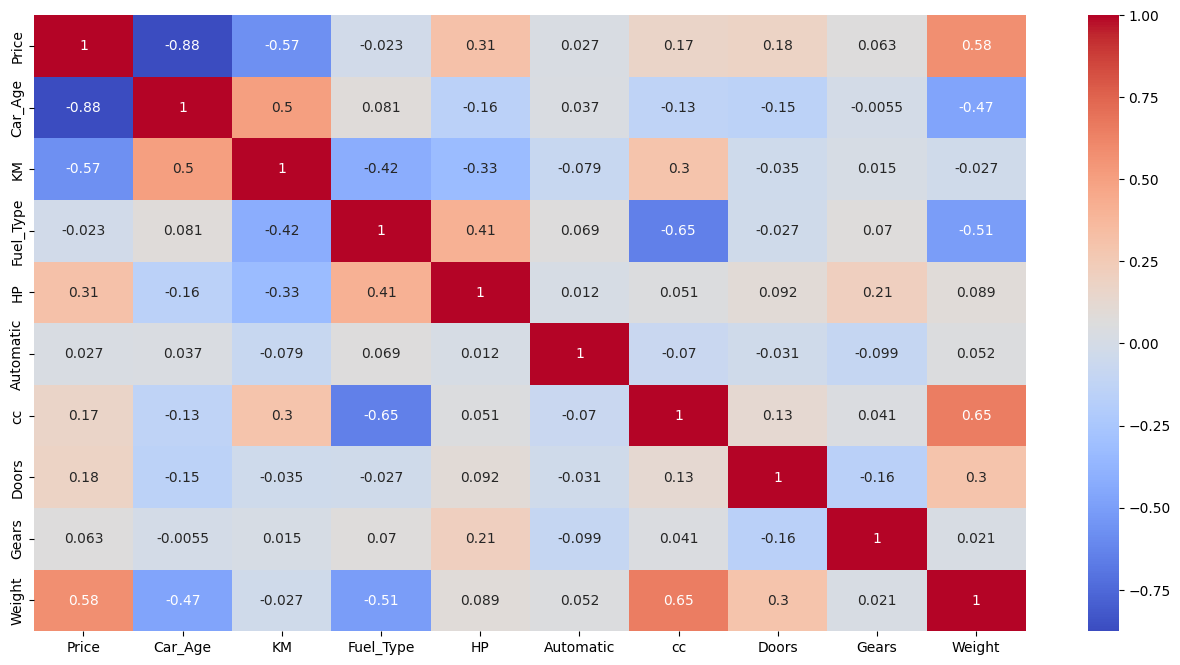

In [ ]:
plt.figure(figsize = (16, 8))
sns.heatmap(TC.corr(), annot = True, cmap = 'coolwarm')



*   Multicollinearity is present

*   There is relationship between independent variables

*   But multicollinearity is not good for model building   

*   Remove multicollinearity using VIF



In [ ]:
TC.columns

Index(['Price', 'Car_Age', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors',
       'Gears', 'Weight'],
      dtype='object')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = TC[['Car_Age', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors', 'Gears', 'Weight']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

     feature         VIF
0    Car_Age   17.186515
1         KM    8.773579
2  Fuel_Type   64.492304
3         HP   75.821918
4  Automatic    1.122812
5         cc  200.505803
6      Doors   22.495878
7      Gears  523.910023
8     Weight  660.878284





*   As we can see, Gears and Weight have very high values of VIF, indicating that these two variables are highly correlated.
*   Hence, considering these two features together leads to a model with high multicollinearity.
*   So we can drop one of the variable which is not important in predicting the dependent variable



<Axes: xlabel='Weight', ylabel='Price'>

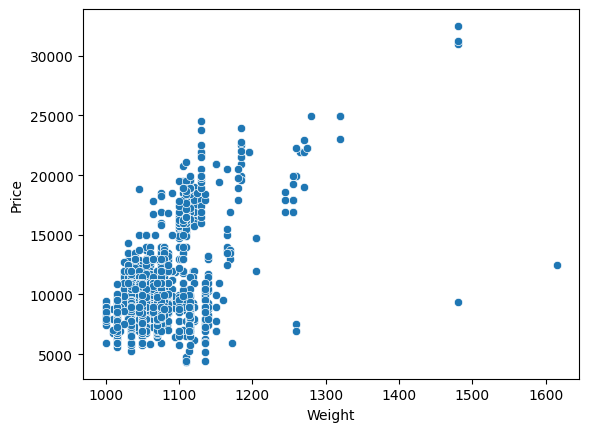

In [ ]:
sns.scatterplot(data = TC, x = 'Weight', y = 'Price')

<Axes: xlabel='Gears', ylabel='Price'>

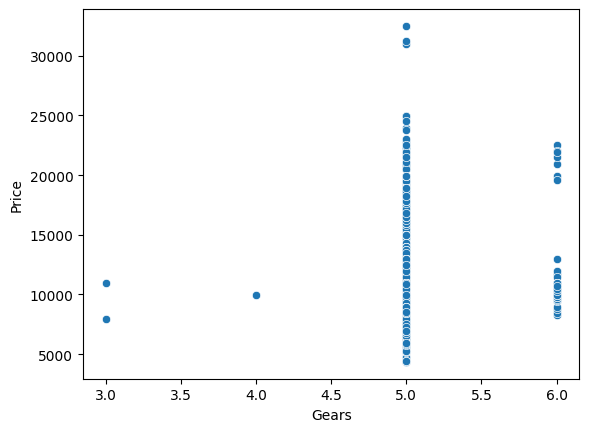

In [ ]:
sns.scatterplot(data = TC, x = 'Gears', y = 'Price')

In [ ]:
TC.corr()

# As we can see here, Weight and Price have high correlation coefficient than Gears and Price
# Drop Gears Column

,Price,Car_Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
Price,1.000000,-0.876377,-0.569268,-0.022759,0.314693,0.026783,0.165085,0.184118,0.063440,0.579851
Car_Age,-0.876377,1.000000,0.504953,0.080753,-0.156132,0.036745,-0.133106,-0.147377,-0.005532,-0.469018
KM,-0.569268,0.504953,1.000000,-0.420531,-0.333258,-0.078653,0.302490,-0.035315,0.014906,-0.026810
Fuel_Type,-0.022759,0.080753,-0.420531,1.000000,0.409400,0.069114,-0.647635,-0.027197,0.069693,-0.506567
HP,0.314693,-0.156132,-0.333258,0.409400,1.000000,0.011586,0.050820,0.092067,0.209558,0.088945
Automatic,0.026783,0.036745,-0.078653,0.069114,0.011586,1.000000,-0.070247,-0.030759,-0.098738,0.051767
cc,0.165085,-0.133106,0.302490,-0.647635,0.050820,-0.070247,1.000000,0.126689,0.040712,0.652154
Doors,0.184118,-0.147377,-0.035315,-0.027197,0.092067,-0.030759,0.126689,1.000000,-0.160101,0.301720
Gears,0.063440,-0.005532,0.014906,0.069693,0.209558,-0.098738,0.040712,-0.160101,1.000000,0.020844
Weight,0.579851,-0.469018,-0.026810,-0.506567,0.088945,0.051767,0.652154,0.301720,0.020844,1.000000


In [ ]:
TC.drop(columns = ['Gears'], inplace = True)

In [ ]:
TC

,Price,Car_Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Weight
0,13500,23,46986,1.0,90,0,2000,3,1165
1,13750,23,72937,1.0,90,0,2000,3,1165
2,13950,24,41711,1.0,90,0,2000,3,1165
3,14950,26,48000,1.0,90,0,2000,3,1165
4,13750,30,38500,1.0,90,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2.0,86,0,1300,3,1025
1432,10845,72,19000,2.0,86,0,1300,3,1015
1433,8500,71,17016,2.0,86,0,1300,3,1015
1434,7250,70,16916,2.0,86,0,1300,3,1015


#Splitting the data into train and test

In [ ]:
x = TC.iloc[:,  1:9]
y = TC['Price']


In [ ]:
x

,Car_Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Weight
0,23,46986,1.0,90,0,2000,3,1165
1,23,72937,1.0,90,0,2000,3,1165
2,24,41711,1.0,90,0,2000,3,1165
3,26,48000,1.0,90,0,2000,3,1165
4,30,38500,1.0,90,0,2000,3,1170
...,...,...,...,...,...,...,...,...
1431,69,20544,2.0,86,0,1300,3,1025
1432,72,19000,2.0,86,0,1300,3,1015
1433,71,17016,2.0,86,0,1300,3,1015
1434,70,16916,2.0,86,0,1300,3,1015


In [ ]:
y

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

#Fitting a Linear Regression Model

In [ ]:
lr = LinearRegression()
l1 = lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred

array([ 8464.43655012, 12904.33444957, 14109.43948824,  7473.01246178,
       12972.25872897, 17548.66957473,  9441.89946595,  7928.69486923,
       10393.87904901, 11652.18690695,  7729.87606594, 10682.4230596 ,
        8438.22357867,  9469.68791458, 10548.51301036,  7770.93622028,
        6036.64636362,  8771.69377709, 17084.0380031 , 10810.38492345,
       16353.04357907,  8194.85665647,  9605.52442421,  6275.42524492,
       13789.05718215, 19054.81940378,  6706.28244916,  7754.51950288,
       15868.46492206, 11155.29488525,  7981.88219126,  8787.97528962,
       14248.6775606 , 26153.320826  , 22364.25739105,  8862.79576868,
       12622.84625711,  7576.73790703,  8652.10748261, 21075.38474001,
        8480.3692854 ,  9345.65448168,  8910.88290367, 10186.10457618,
        8809.93869029,  9317.50265318,  9595.1092075 ,  9160.63457104,
        6480.40374267,  6450.49984416, 11059.99853883, 12609.7694436 ,
       11168.08442092,  9055.75913108,  7466.50274913, 16802.41320251,
      

In [ ]:
lr.coef_

array([-1.26425921e+02, -1.50304326e-02, -5.89978375e+01,  3.48636104e+01,
        2.65025223e+02, -1.20085698e+00, -3.89579434e+01,  1.92761029e+01])

In [ ]:
lr.score(x_train, y_train), lr.score(x_test, y_test) # This is accuracy is good, but we can also try other models for better accuracy

(0.8576267580958352, 0.8770639591899105)

# Fitting the OLS model
Linear Regression: A general concept of modeling a linear relationship between variables.
OLS (Ordinary Least Squares): A specific algorithm within linear regression that finds the best fit line by minimizing the sum of squared errors between the predicted and actual values.

In [ ]:
# # statsmodels library is used for multiple purposes like statistical calculations, hypothesis testing, linear regression model building, etc
import statsmodels.formula.api as smf # model - Regression model, "Y~X", OR "Dependent_variable~Independent_Variable"
model = smf.ols('Price~Car_Age+KM+Fuel_Type+HP+Automatic+cc+Doors+Weight', data = TC)# Ordinary Least Squares, y Dep. variable - sunday, then give ~ symbol and then x Ind.Variable - daily,
model1 = model.fit() # dataset - data, fit() - fit the regression line


In [ ]:
model1.params
# Reg. Equn: Price = B0 + B1*Car_Age + B2*KM +B3*Fuel_Type + B4*HP + B5*Automatic + B6*cc + B7*Doors + B8*Weight
# In output: Intercept(i.e. best fit line is intersecting y axis at -7169.67) - B0, Car_Age - coefficient of Car_Age i.e.B1 and so om


,0
Intercept,-7169.679290
Car_Age,-122.966164
KM,-0.016050
Fuel_Type,293.101174
HP,29.911595
Automatic,168.626594
cc,-1.363325
Doors,-64.237598
Weight,23.013962


In [ ]:
model1.rsquared

0.8652425593785709

<Axes: xlabel='Car_Age', ylabel='Price'>

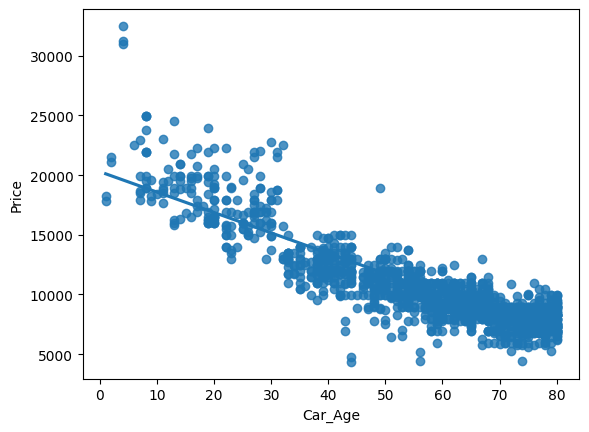

In [ ]:
sns.regplot(data = TC, x = 'Car_Age', y = 'Price', ci = None)
# if ci=None is not written it will show shaded part around the line.
# It is the size of the confidence interval for the regression estimate.
# This will be drawn using translucent bands around the regression line.

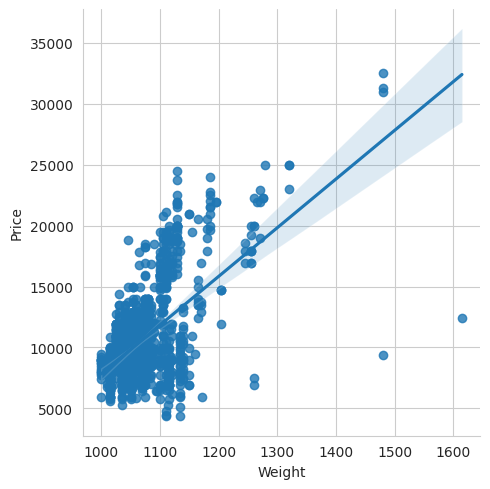

In [ ]:
sns.set_style('whitegrid')
sns.lmplot(x ='Weight', y ='Price', data = TC,
           palette ='plasma')

#Fit regression model on Transformed Data



* Here we can treat the outliers by capping

                  OR        

* To overcome the effect of outliers perform transformations. Skewed Histogram will become approximately equal to normal

* Log of every column can be taken. It doesn't change the pattern/information in data but changes values to different scales

* SQRT Transformation







In [ ]:
df = pd.DataFrame()
df['Log_Price'] = np.log(TC['Price'])
df['Log_Car_Age'] = np.log(TC['Car_Age'])
df['Log_Fuel_Type'] = np.log(TC['Fuel_Type'])
df['Log_HP'] = np.log(TC['HP'])
df['Log_KM'] = np.log(TC['KM'])
df['Log_cc'] = np.log(TC['cc'])
df['Log_Weight'] = np.log(TC['Weight'])
df['Log_Automatic'] = np.log(TC['Automatic'])
df['Log_Doors'] = np.log(TC['Doors'])

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
df

,Log_Price,Log_Car_Age,Log_Fuel_Type,Log_HP,Log_KM,Log_cc,Log_Weight,Log_Automatic,Log_Doors
0,9.510445,3.135494,0.000000,4.499810,10.757605,7.600902,7.060476,-inf,1.098612
1,9.528794,3.135494,0.000000,4.499810,11.197351,7.600902,7.060476,-inf,1.098612
2,9.543235,3.178054,0.000000,4.499810,10.638520,7.600902,7.060476,-inf,1.098612
3,9.612467,3.258097,0.000000,4.499810,10.778956,7.600902,7.060476,-inf,1.098612
4,9.528794,3.401197,0.000000,4.499810,10.558414,7.600902,7.064759,-inf,1.098612
...,...,...,...,...,...,...,...,...,...
1431,8.922658,4.234107,0.693147,4.454347,9.930324,7.170120,6.932448,-inf,1.098612
1432,9.291459,4.276666,0.693147,4.454347,9.852194,7.170120,6.922644,-inf,1.098612
1433,9.047821,4.262680,0.693147,4.454347,9.741909,7.170120,6.922644,-inf,1.098612
1434,8.888757,4.248495,0.693147,4.454347,9.736015,7.170120,6.922644,-inf,1.098612


,Log_Automatic
0,-inf
1,-inf
2,-inf
3,-inf
4,-inf
...,...
1431,-inf
1432,-inf
1433,-inf
1434,-inf


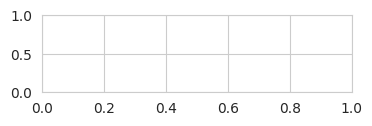

In [ ]:
df.Log_Automatic

<ipython-input-110-c8282cc5c2e6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(TC['Weight'])
<ipython-input-110-c8282cc5c2e6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Log_Weight'])
<ipython-input-110-c8282cc5c2e6>:8: UserWarning: 

`distplot` is a deprecated function and will be r

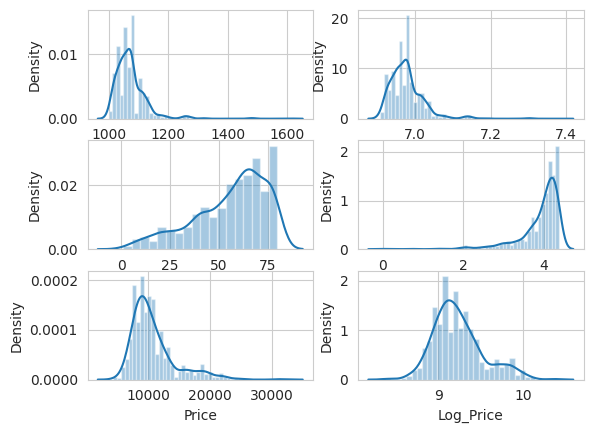

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.subplot(3, 2, 1)
sns.distplot(TC['Weight'])

plt.subplot(3, 2, 2)
sns.distplot(df['Log_Weight'])

plt.subplot(3,2, 3)
sns.distplot(TC['Car_Age'])

plt.subplot(3,2, 4)
sns.distplot(df['Log_Car_Age'])

plt.subplot(3,2, 5)
sns.distplot(TC['Price'])

plt.subplot(3,2, 6)
sns.distplot(df['Log_Price'])

plt.show()
plt.tight_layout()



*   After Log Transformation the data has not changed much, it is still skewed

*   So here Transformation does not work



#Lasso Regression

In [ ]:
l1 = Lasso()
l1.fit(x_train, y_train)
y_hat = l1.predict(x_test)
y_hat

array([ 8464.63290315, 12860.65337302, 14090.56293847,  7474.28119803,
       12974.38466477, 17548.70931759,  9444.43506074,  7931.2262025 ,
       10393.09759372, 11653.42958046,  7733.41267783, 10685.92437154,
        8419.91143656,  9472.84045277, 10552.17515359,  7773.18504472,
        6040.33153702,  8771.29839538, 17086.02013663, 10811.44247249,
       16354.15280026,  8194.31840131,  9607.27639284,  6278.83866721,
       13790.93572403, 19053.88755915,  6707.11849598,  7754.83890734,
       15871.69302466, 11156.86912191,  7986.65602225,  8773.63141266,
       14250.48995707, 26155.58363918, 22359.13350546,  8863.73622156,
       12624.30472458,  7579.446937  ,  8632.268359  , 21064.30074045,
        8480.43599892,  9348.53632616,  8912.23597605, 10182.63566441,
        8811.05777608,  9320.06582669,  9595.58413486,  9161.49781196,
        6482.51083004,  6451.04775725, 11060.37422564, 12613.01993195,
       11153.08517551,  9055.73864274,  7470.46290194, 16803.4682037 ,
      

In [ ]:
l1.score(x_train, y_train), l1.score(x_test, y_test) #This model is over fitted as test accuracy is higher than training accuracy

(0.8576232189980393, 0.8772757779469448)

#**Hyperparameter Tuning**

In [ ]:
for i in range(300, 400):
  l1 = Lasso(alpha = i)
  l1.fit(x_train, y_train)
  print(f"Alpha: {i} Train: {l1.score(x_train, y_train)}, Test: {l1.score(x_test, y_test)}")

Alpha: 300 Train: 0.8571386205108031, Test: 0.8775849586159828
Alpha: 301 Train: 0.8571380983412862, Test: 0.8775853671915739
Alpha: 302 Train: 0.857137574434083, Test: 0.8775857740140386
Alpha: 303 Train: 0.8571370487891935, Test: 0.877586179083377
Alpha: 304 Train: 0.8571365214066176, Test: 0.8775865823995891
Alpha: 305 Train: 0.8571359922863553, Test: 0.8775869839626749
Alpha: 306 Train: 0.8571354614284066, Test: 0.8775873837726343
Alpha: 307 Train: 0.8571349288327716, Test: 0.8775877818294675
Alpha: 308 Train: 0.8571343944994504, Test: 0.8775881781331744
Alpha: 309 Train: 0.8571338584284427, Test: 0.8775885726837548
Alpha: 310 Train: 0.8571333206197487, Test: 0.877588965481209
Alpha: 311 Train: 0.8571327810733684, Test: 0.8775893565255369
Alpha: 312 Train: 0.8571322397893018, Test: 0.8775897458167385
Alpha: 313 Train: 0.8571316967675486, Test: 0.8775901333548138
Alpha: 314 Train: 0.8571311520081093, Test: 0.8775905191397628
Alpha: 315 Train: 0.8571306055109835, Test: 0.877590903171



*   Even after trying so many values of alpha,the accuracy remains the same
*   So we can try different model to see if the accuracy changes



#Ridge Regression

In [ ]:
l2 = Ridge()
l2.fit(x_train, y_train)
l2.score(x_train, y_train), l2.score(x_test, y_test)

(0.8576266449080222, 0.8770844911689089)

In [ ]:
for i in range(1,50):
  l2 = Ridge(alpha = i)
  l2.fit(x_train,y_train)
  print(f"Alpha: {i} Train: {l2.score(x_train, y_train)}, Test: {l2.score(x_test, y_test)}")

Alpha: 1 Train: 0.8576266449080222, Test: 0.8770844911689089
Alpha: 2 Train: 0.8576263232204057, Test: 0.8771038751743405
Alpha: 3 Train: 0.8576258174947945, Test: 0.8771221986926059
Alpha: 4 Train: 0.8576251493786484, Test: 0.8771395408650328
Alpha: 5 Train: 0.8576243380593584, Test: 0.8771559734374661
Alpha: 6 Train: 0.8576234005690504, Test: 0.8771715615849396
Alpha: 7 Train: 0.8576223520475471, Test: 0.8771863646300105
Alpha: 8 Train: 0.8576212059698356, Test: 0.8772004366702616
Alpha: 9 Train: 0.857619974343327, Test: 0.8772138271279647
Alpha: 10 Train: 0.8576186678793345, Test: 0.8772265812328285
Alpha: 11 Train: 0.8576172961424845, Test: 0.8772387404470499
Alpha: 12 Train: 0.857615867681189, Test: 0.8772503428404743
Alpha: 13 Train: 0.8576143901418212, Test: 0.8772614234224936
Alpha: 14 Train: 0.8576128703688348, Test: 0.8772720144363326
Alpha: 15 Train: 0.8576113144927281, Test: 0.8772821456205491
Alpha: 16 Train: 0.8576097280074724, Test: 0.8772918444418877
Alpha: 17 Train: 0.

For every alpha value the accuracy still remains the same



*   As we are getting same accuarcy with every model, we can finalize any model.
*   Also we have got the good accuracy to be considered


#Interview Questions
1.What is Normalization & Standardization and how is it helpful?

Normalization and standardization are data preprocessing techniques used in machine learning and data science to scale numerical features within a dataset, essentially bringing all features to a comparable range, making it easier for algorithms to process and analyze the data effectively.

while normalization typically scales data between 0 and 1,

standardization transforms data to have a mean of 0 and a standard deviation of 1.

With each method being useful depending on the data distribution and the specific machine learning model being used.

2.What techniques can be used to address multicollinearity in multiple linear regression?

To address multicollinearity in multiple linear regression, common techniques include: removing highly correlated variables, using dimensionality reduction methods like Principal Component Analysis (PCA), and applying regularization techniques like Ridge Regression or Lasso Regression